# Python Standardbibliotheken


## Covid (JSON)

Laden von JSON Daten, Filter der Covid Zahlen für die gesammte Schweiz und Visualiserung als Line Chart.

Schauen Sie sich die Datei covid.json im VS Code an. Uns interessieren die drei folgenden Felder:
- geoRegion
- datum
- entries

### 1. Setup
Importieren Sie folgende Bibliotheken
```
import json
import matplotlib.pyplot as plt
import numpy as np
```

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

### 2. Daten einlesen
- Lesen sie die JSON Datei mit den Befehle json.load(...) innerhalb eines with Blocks in die Variable records ein.

In [3]:
filename = "lesson61_lab_covid.json"

with open(filename, "r", encoding="UTF-8") as f:
    records = json.load(f)

### 3. Daten selektieren
- Erstellen Sie zwei leere listen für die X- und Y-Achsenwerte.
- Iterieren Sie über alle Records und filtern Sie die Werte aus der geoRegion "CH".
- Das Feld datum wird zur Liste für die X-Achse hinzugefügt.
- Das Feld entries kommt in die Liste für die Y-Achse.

In [4]:
x = []
y = []
for record in records:
    if record['geoRegion'] != 'CH':
        continue
    x.append(record['datum'])
    y.append(record['entries'])

In [5]:
print(x[:5])

['2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28']


In [6]:
print(y[:5])

[1, 1, 10, 10, 10]


### 4. Daten visualisieren
- Erstellen Sie einen plot mit der Matplotlib. 
- Die X-Achse können sie mit folgendem Befehl optimieren:
  plt.xticks(np.arange(0, len(x)+1, 80))

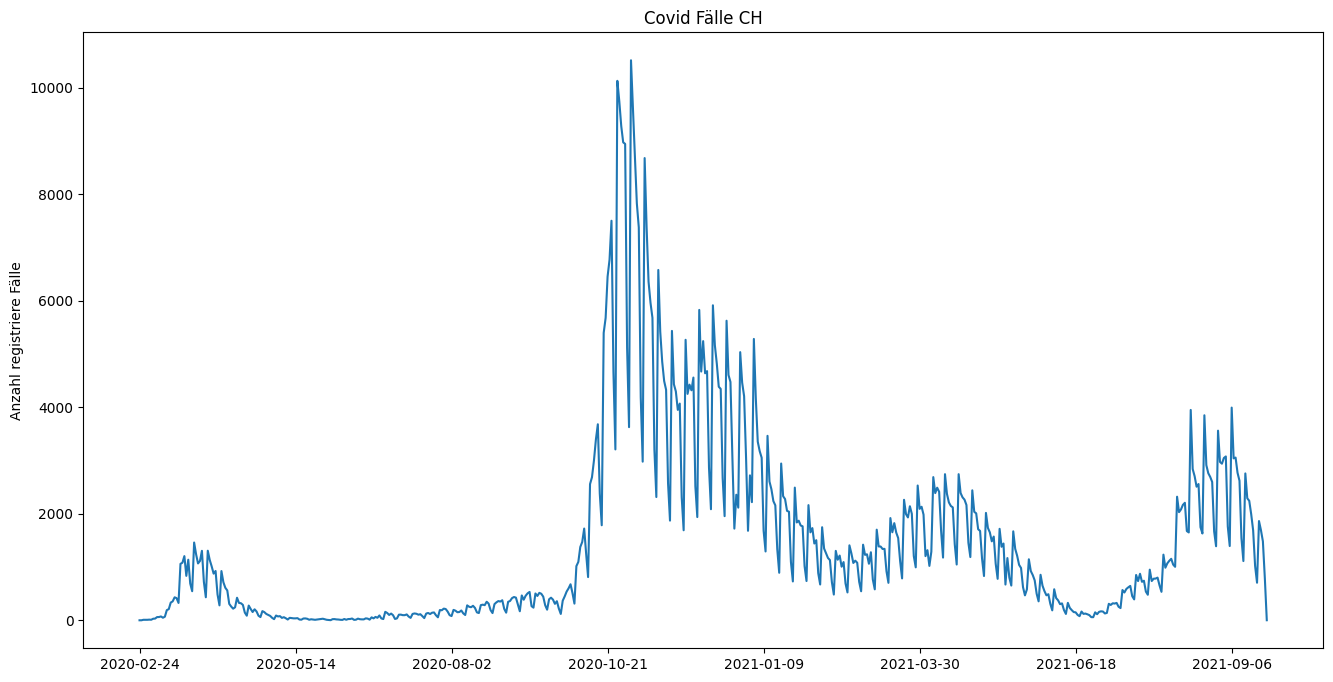

In [7]:
plt.figure(figsize=(16,8))

plt.plot(x,y)
plt.xticks(np.arange(0, len(x)+1, 80))

plt.title("Covid Fälle CH")
plt.ylabel("Anzahl registriere Fälle")

plt.show()

# Zusatzaufgabe

Wir wollen zusätzlich eine geglätete Kurve mit dem Durchschnitt der letzten 7 Tage darstellen. Dazu führen wir folgende Schritte aus:

1. Erstellung von zwei neue leere Listen `x_avg` und `y_avg` sowie die Variablen
   - `window` für die Anzahl Tage für die Berechnung des Durchschnitt
   - `count` als temporärer counter für die Berechnung der aktuellen Summe
   - `sum` zur aufaddieren der einzelnen Werte für die spätere Durchschnittsberechnung

2. Iterieren sie über alle Elemente von y und bilden jeweils die Summe der nächsten Anzahl Tage.
   - Sobald im Loop die Anzahl Tage erreicht wird, wird der Durchschnittswert in die neue Liste `y_avg` gespeichert
   - Sowie das letzte Datum der Durchschnittswerte in die neue Liste `x_avg`
   - Benutzen Sie die beiden temporären Variablen `count` und `sum` für die Berechnung der einzelnen Durchschnitte und setzen sie diese jeweils zurück, sobald ein neuer Durchschnittswert bestimmt ist.

3. Am Ende vom Loop hat man eine neue Zahlenreihe mit den Durchschnittswerten und dem jeweils einem dazugehärigem Datum. Diese können jetzt zusätzlich zur original Kurve visualisiert werden.

5. Erstellen Sie eine neue Grafik mit dem bisherigen Plot und der zusätzlich neuen Werte. Dazu können sie einfach nochmals die Funktion `plt.plot(x_avg,y_avg)` mit der neuen Zahlenreihe aufrufen.

6. Ergänzen sie die Grafik mit einer Legende für die beiden Plots.

In [8]:

number_of_elements = len(x)

x_avg = []
y_avg = []

window  = 7
count = 0
sum = 0

for i in range(number_of_elements):
    sum = sum + int(y[i])
    count = count + 1
    if count == window:
        # Erstelle neuen Eintrag mit dem Durchschittswert
        y_avg.append(sum / count)
        x_avg.append(x[i])
        count = 0
        sum = 0
        
# Erstelle Eintrag mit dem lezten Durchschittswert
x_avg.append(sum / count)
y_avg.append(y[i])

print(len(y_avg))
print(y_avg)

83
[8.0, 53.714285714285715, 323.7142857142857, 937.0, 1049.2857142857142, 860.7142857142857, 514.2857142857143, 262.7142857142857, 166.85714285714286, 100.0, 57.285714285714285, 33.0, 22.0, 18.0, 14.0, 20.0, 24.428571428571427, 51.0, 97.71428571428571, 90.71428571428571, 102.14285714285714, 118.0, 165.0, 157.14285714285714, 224.85714285714286, 265.0, 298.85714285714283, 351.0, 408.57142857142856, 415.14285714285717, 317.14285714285717, 494.57142857142856, 1250.142857142857, 2783.0, 5667.714285714285, 7975.714285714285, 7313.285714285715, 5655.714285714285, 4302.857142857143, 3740.8571428571427, 3897.0, 4286.857142857143, 4180.285714285715, 3421.4285714285716, 3340.1428571428573, 3144.0, 2165.714285714286, 1925.0, 1643.2857142857142, 1436.2857142857142, 1123.0, 996.2857142857143, 1030.4285714285713, 1082.2857142857142, 1254.7142857142858, 1498.2857142857142, 1790.5714285714287, 1755.0, 2018.7142857142858, 2011.2857142857142, 2074.1428571428573, 1695.142857142857, 1471.4285714285713, 11

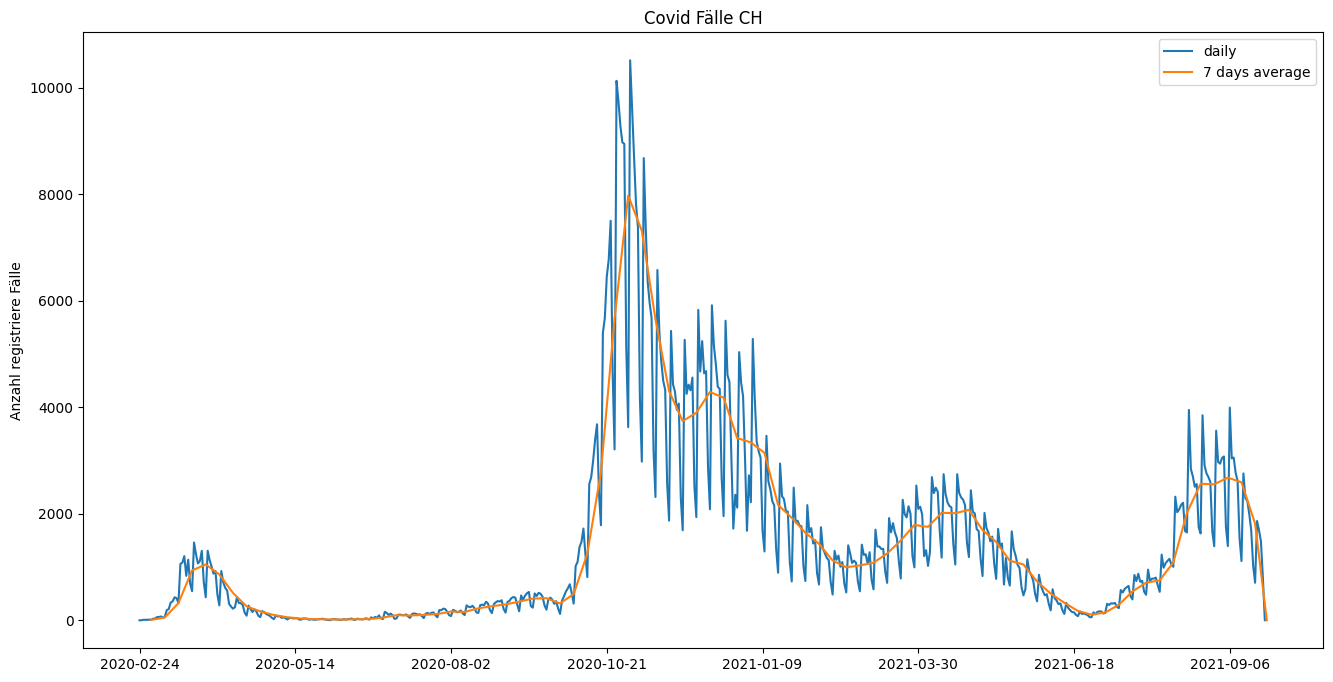

In [9]:

avg_label = f"{window} days average"

plt.figure(figsize=(16,8))

plt.plot(x,y, label="daily")
plt.plot(x_avg,y_avg, label=avg_label)
plt.xticks(np.arange(0, len(x)+1, 80))

plt.title("Covid Fälle CH")
plt.ylabel("Anzahl registriere Fälle")
plt.legend()

plt.show()